In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CREATE_EMBEDDINGS = False

if CREATE_EMBEDDINGS:

    from data import get_images, IMG_SIZE, get_embeddings
    from models import embedding_network_contrastive
    import tensorflow as tf

    DATASET_DIR = "../../data/dataset_condensed/cropped_head/direction"

    with open("../../data/classes_condensed_head.txt") as file:
        classes = [line.strip() for line in file]

        X, y = get_images(DATASET_DIR, classes, IMG_SIZE)

        X = np.array(X)
        X = tf.keras.applications.inception_v3.preprocess_input(X)
        y = np.array(y)

        embedding_model = embedding_network_contrastive
        embedding_model.load_weights('../models/embedding')
        X_embeddings, y_embeddings = get_embeddings(embedding_model, X, y)

        columns = ["x" + str(i) for i in range(128)] + ["y"]
        df = pd.DataFrame(np.column_stack([X_embeddings, y_embeddings]), columns=columns)
        df = df.astype({"y": int})
        df.to_csv("../embeddings/embeddings.csv", index=False)

else:

    CSV_FILE = '../notebooks/dataset_w_embeddings.csv'

    df = pd.read_csv(CSV_FILE)

df.head()

,filename,set,sex,length,date,source,x0,x1,x2,x3,...,x119,x120,x121,x122,x123,x124,x125,x126,x127,y
0,201506_l_0.jpg,query,f,137.0,2019-10-29,LabMain,-0.077116,0.105637,-0.074271,0.100927,...,0.036466,-0.048465,0.105189,0.029454,0.018002,-0.200931,-0.020879,0.081510,0.013793,1
1,201506_l_2.jpg,query,f,137.0,2019-10-29,quad,-0.054578,0.034175,-0.067500,0.146062,...,0.110624,-0.113440,0.038642,-0.058823,0.081565,-0.096594,-0.065069,0.099355,-0.046805,1
2,201506_l_3.jpg,query,f,137.0,2019-10-29,quad,-0.029930,0.129353,-0.206279,0.007257,...,-0.032276,-0.079401,0.155462,-0.003738,0.091456,-0.087082,-0.065093,0.044110,0.039260,1
3,201506_l_5.jpg,query,f,137.0,2019-10-29,quad,-0.086292,0.017957,-0.125244,0.197527,...,0.006151,0.138126,0.068444,-0.125858,0.174686,-0.023180,-0.075904,0.075828,0.024108,1
4,201506_r_2.jpg,query,f,137.0,2019-10-29,quad,0.026595,-0.021073,0.060628,-0.019170,...,-0.020983,-0.241554,0.095273,-0.009953,0.134105,-0.008553,-0.165508,0.056555,0.097931,0


In [73]:
FILTER = True
if FILTER:
    df = df[df["y"] < 100]
    df = df.reset_index(drop=True)


In [3]:
df = df.astype({"y": int})
df.describe()

,length,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x119,x120,x121,x122,x123,x124,x125,x126,x127,y
count,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,...,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000
mean,137.228681,-0.027508,0.009830,-0.023386,-0.000459,0.023150,-0.012180,-0.015576,0.003484,-0.044033,...,-0.015808,-0.044710,-0.007780,0.006448,-0.004172,0.006967,-0.033629,0.028291,0.004116,433.856300
std,18.702810,0.085877,0.078991,0.076094,0.086614,0.086567,0.079008,0.086873,0.074626,0.088598,...,0.078153,0.097244,0.087194,0.077903,0.085684,0.092663,0.081960,0.079540,0.076259,275.282767
min,95.000000,-0.320762,-0.269105,-0.272657,-0.297184,-0.274368,-0.281936,-0.282872,-0.227140,-0.300753,...,-0.304998,-0.301948,-0.323390,-0.248185,-0.284390,-0.353153,-0.314275,-0.223476,-0.256676,0.000000
25%,126.000000,-0.086706,-0.044242,-0.073397,-0.062758,-0.032601,-0.065770,-0.078396,-0.049787,-0.106742,...,-0.066380,-0.111995,-0.067073,-0.044885,-0.063411,-0.057609,-0.089735,-0.027673,-0.050385,218.000000
50%,137.000000,-0.030562,0.009284,-0.020436,-0.002820,0.026826,-0.011949,-0.016195,0.002292,-0.049471,...,-0.016173,-0.047183,-0.009819,0.007476,-0.000971,0.006296,-0.032821,0.027570,0.003160,351.000000
75%,147.000000,0.031196,0.064911,0.030292,0.060944,0.082225,0.040227,0.044253,0.056453,0.015138,...,0.038014,0.018493,0.049017,0.060825,0.057880,0.070348,0.024785,0.084215,0.054934,668.000000
max,220.000000,0.280567,0.289320,0.216303,0.262775,0.277076,0.289594,0.269864,0.236326,0.262558,...,0.211603,0.281217,0.285948,0.240531,0.280873,0.288358,0.270154,0.314533,0.292679,1004.000000


In [52]:
np.min(df.min().values[:-2])

TypeError: '<=' not supported between instances of 'str' and 'float'

In [5]:
unique_values = len(df.y.unique())
unique_values

931

In [4]:
feature_count = len(df.columns) - 2
feature_count

133

In [6]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df.iloc[:,6:-1])

#feat_cols = [ 'x'+str(i) for i in range(feature_count) ]
df_pca = df.copy()
df_pca['y'] = df['y']
df_pca['pca-one'] = pca_result[:,0]
df_pca['pca-two'] = pca_result[:,1]
df_pca['pca-three'] = pca_result[:,2]
df_pca.head()

df_pca['pca-one'] = df_pca['pca-one'] / df_pca['pca-one'].max()

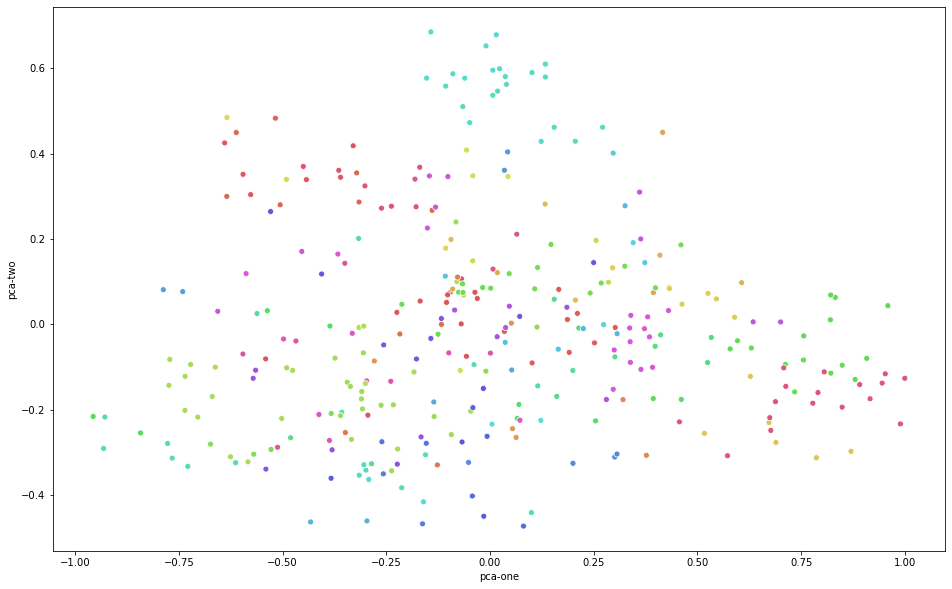

In [56]:
plt.figure(figsize=(16,10))
p = sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", unique_values),
    data=df_pca,
    legend=False
)

#for i in range(0, df_pca.shape[0]):#, 10):
#     p.text(df_pca["pca-one"][i]+0.001, df_pca["pca-two"][i],
#     df_pca["y"][i], horizontalalignment='left',
#     size='medium', color='black')

from matplotlib.patches import Ellipse
ax = plt.gca()
for i in range(0, df_pca.shape[0]):
    if df_pca["set"][i] == 'test':
        circle = Ellipse((df_pca["pca-one"][i], df_pca["pca-two"][i]), width=0.05, height=0.05, color='b', fill=False)
        ax.add_artist(circle)

In [34]:
df_test = df_pca[df_pca['set'] == 'test']
df_train = df_pca[df_pca['set'] == 'train']

from sklearn.metrics import accuracy_score
from ..src.metrics import mean_accuracy_at_k

k= 5
y_list = []
for i, row in df_test.iterrows():
    x_query = row['x0':'x127']
    x_support = df_train.loc[:, 'x0':'x127']
    query_result = np.linalg.norm(x_support.sub(x_query), axis=1)
    df_train['distance'] = query_result
    df_sorted = df_train.sort_values(by='distance', ignore_index=True)  # TODO: Indent?
    k_best = df_sorted['y'][:k]
    y_list.append(k_best)
y_list = np.array(y_list)
print(accuracy_score(df_test['y'], y_list[:,0]))
mean_accuracy_at_k(df_test['y'], y_list, k)

ImportError: attempted relative import with no known parent package

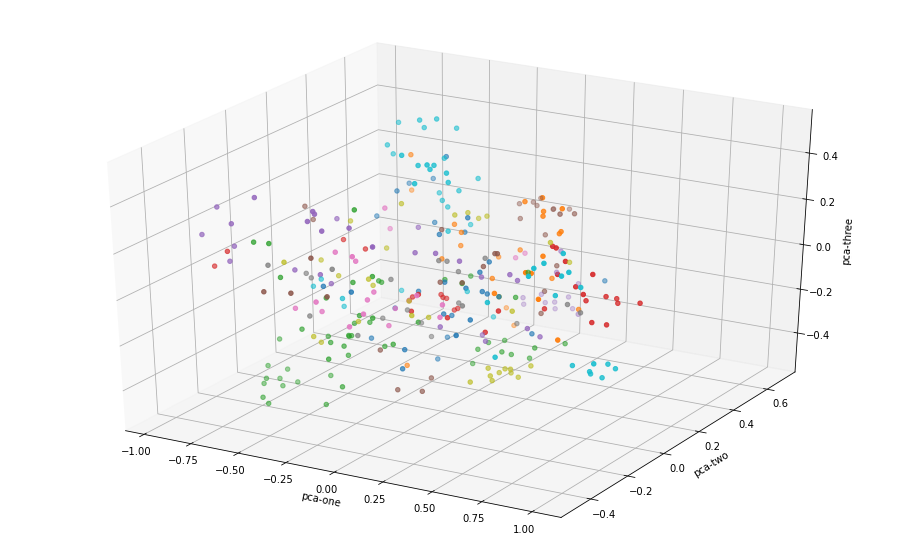

In [57]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_pca["pca-one"],
    ys=df_pca["pca-two"],
    zs=df_pca["pca-three"],
    c=df_pca["y"],
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

plt.show()

In [7]:
#tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(df.iloc[:,6:-1])

df_pca['tsne-2d-one'] = tsne_results[:,0]
df_pca['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3389 samples in 0.075s...
[t-SNE] Computed neighbors for 3389 samples in 2.164s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3389
[t-SNE] Computed conditional probabilities for sample 2000 / 3389
[t-SNE] Computed conditional probabilities for sample 3000 / 3389
[t-SNE] Computed conditional probabilities for sample 3389 / 3389
[t-SNE] Mean sigma: 0.433507
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.338966
[t-SNE] KL divergence after 1000 iterations: 1.181701


In [8]:
with open("../../data/classes_direction.txt") as file:
    classes = [line.strip() for line in file]

df_pca["class"] = df_pca["y"].apply(lambda x: classes[x])
df_pca

,filename,set,sex,length,date,source,x0,x1,x2,x3,...,x125,x126,x127,y,pca-one,pca-two,pca-three,tsne-2d-one,tsne-2d-two,class
0,201506_l_0.jpg,query,f,137.0,2019-10-29,LabMain,-0.077116,0.105637,-0.074271,0.100927,...,-0.020879,0.081510,0.013793,1,0.171254,0.172667,-0.100993,-50.349865,16.316477,201506_l
1,201506_l_2.jpg,query,f,137.0,2019-10-29,quad,-0.054578,0.034175,-0.067500,0.146062,...,-0.065069,0.099355,-0.046805,1,0.033470,0.201142,0.131093,-52.472569,13.742358,201506_l
2,201506_l_3.jpg,query,f,137.0,2019-10-29,quad,-0.029930,0.129353,-0.206279,0.007257,...,-0.065093,0.044110,0.039260,1,0.065795,0.305026,0.188425,-54.419022,14.328360,201506_l
3,201506_l_5.jpg,query,f,137.0,2019-10-29,quad,-0.086292,0.017957,-0.125244,0.197527,...,-0.075904,0.075828,0.024108,1,0.248897,0.142857,0.128346,-52.632816,16.139620,201506_l
4,201506_r_2.jpg,query,f,137.0,2019-10-29,quad,0.026595,-0.021073,0.060628,-0.019170,...,-0.165508,0.056555,0.097931,0,-0.265327,0.168110,0.058930,-28.121763,-63.067677,201506_r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,67510_r_1.jpg,support,f,128.0,2018-06-01,FieldMain,0.063999,-0.011805,-0.081763,0.045121,...,-0.087980,0.128534,0.030491,1000,-0.305440,0.101113,-0.065050,2.470652,-24.341619,67510_r
3385,67516_r_0.jpg,support,f,158.0,2018-09-04,FieldMain,0.083352,-0.044169,-0.054885,-0.013318,...,-0.191089,-0.098140,0.040400,1002,-0.419652,0.310889,0.039163,-5.361917,-27.013870,67516_r
3386,67516_r_1.jpg,support,f,157.0,2018-07-03,FieldMain,0.061353,-0.023312,-0.090306,-0.028941,...,-0.212806,-0.119440,0.019543,1002,-0.595071,0.298657,0.076856,-5.412504,-27.042974,67516_r
3387,67908_l_0.jpg,support,m,149.0,2018-09-10,FieldMain,0.031002,-0.001717,0.074633,-0.068919,...,0.028813,-0.135485,0.023307,1003,-0.135196,-0.179309,-0.074168,22.232773,32.076378,67908_l


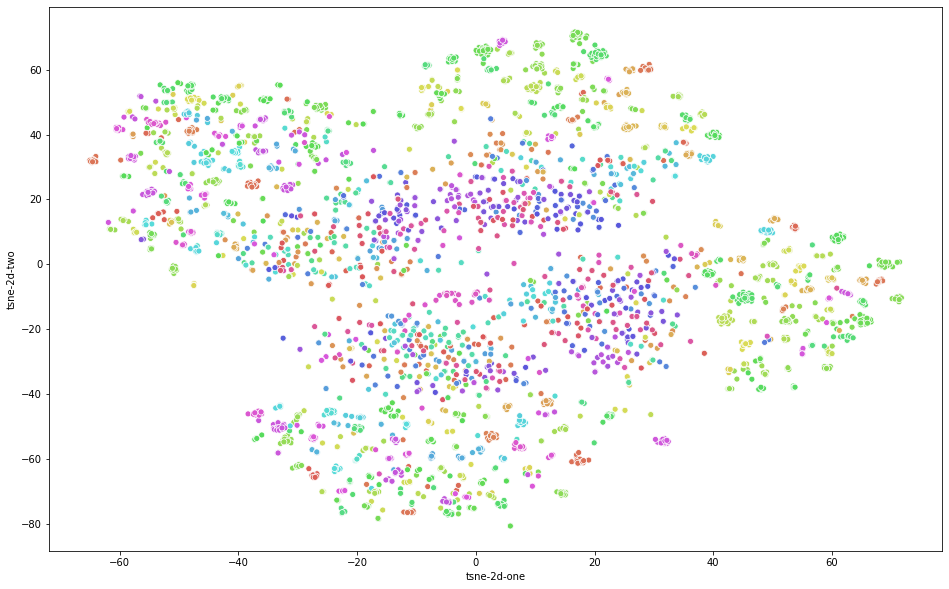

In [11]:
plt.figure(figsize=(16,10))

ax = plt.gca()
#ax.set_facecolor("#EEE")

#for i in range(0, df_pca.shape[0]):
#    if df_pca["source"][i] == 'quad':
#        circle = plt.Circle((df_pca["tsne-2d-one"][i], df_pca["tsne-2d-two"][i]), 1, color='#8ABFBA', fill=True, zorder=0)
#        ax.add_artist(circle)

p1 = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", unique_values),
    data=df_pca,
    legend=False
)

#for i in range(0, df_pca.shape[0], 10):
#     p1.text(df_pca["tsne-2d-one"][i]+1.0, df_pca["tsne-2d-two"][i],
#     df_pca["class"][i], horizontalalignment='left',
#     size='medium', color='black')
#     p1.text(df_pca["tsne-2d-one"][i]-1.5, df_pca["tsne-2d-two"][i],
#     df_pca["y"][i], horizontalalignment='left',
#     size='medium', color='black')



plt.savefig("tsne.png")

In [19]:
df_pca_portion = df_pca[df_pca['pca-two'] > 0]
selected_classes = list(df_pca_portion["class"])
selected_classes = [c.split("_")[1] for c in selected_classes]
from collections import Counter
cnt = Counter(selected_classes)
tup = zip(cnt.keys(), cnt.values())
for t in tup:
    print(t)

('l', 75)
('r', 71)
